In [1]:
from collections import Counter
import os
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm

import anndata
import scanpy as sc

In [2]:
import matplotlib as mpl

In [3]:
SEED = 1235
random.seed(SEED)
np.random.seed(SEED)

In [4]:
mpl.rcParams['figure.facecolor'] = 'white'

In [5]:
orig_data_path = "/home/dor3/cell2sentence/cross_species/Syed_CellOT_Code/datasets/harmony_common_pancreas_20241025.h5ad"
BASE_PATH = "/home/dor3/cell2sentence/cross_species/CellOT_on_Homologous_Data/models/results_human_to_mouse/evals_iid_data_space"
cell_ot_transported_data_path = os.path.join(BASE_PATH, "imputed.h5ad")

In [6]:
orig_adata = anndata.read_h5ad(orig_data_path)
orig_adata

AnnData object with n_obs × n_vars = 9436 × 12113
    obs: 'cell_barcodes', 'cell_manual_ids', 'cell_types', 'batch_sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'species_cell_type_label', 'species_label'
    var: 'homolog_pair_idx', 'human_gene_name', 'mouse_gene_name', 'human_gene_ensembl_id', 'mouse_gene_ensembl_id', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'hvg', 'neighbors', 'pca', 'species_label_colors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony_library', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [7]:
print(orig_adata.X.data.max())
print(orig_adata.X.data.mean())
print(orig_adata.X.data.min())

8.047143
0.95751846
0.13720855


In [8]:
plots_dir = os.path.join(BASE_PATH, "plots")
plots_dir

'/home/dor3/cell2sentence/cross_species/CellOT_on_Homologous_Data/models/results_human_to_mouse/evals_iid_data_space/plots'

/vast/palmer/home.mccleary/sr2464/.conda/envs/cell2sentence/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


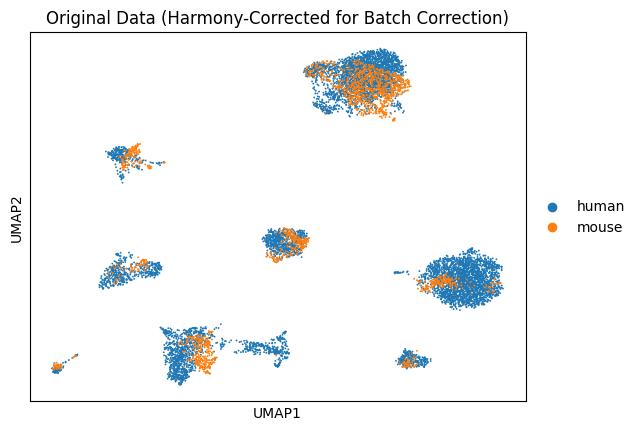

In [9]:
plot_path = os.path.join(plots_dir, "umap_orig_data_harmony_corrected_color_species.png")
sc.pl.umap(
    orig_adata,
    color="species_label",
    title="Original Data (Harmony-Corrected for Batch Correction)",
    s=7,
    show=False
)
plt.savefig(plot_path, facecolor="white", bbox_inches="tight", dpi=300)
plt.show()
plt.close()

/vast/palmer/home.mccleary/sr2464/.conda/envs/cell2sentence/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


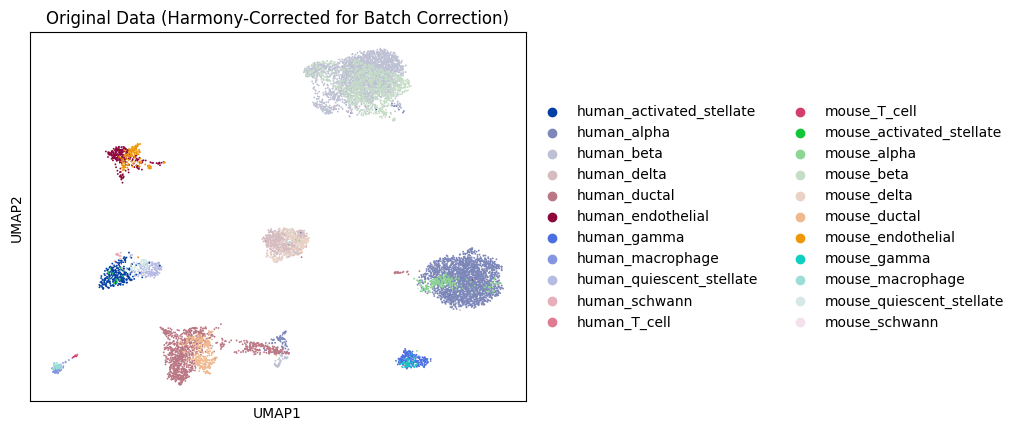

In [10]:
plot_path = os.path.join(plots_dir, "umap_orig_data_harmony_corrected_cell_type.png")
sc.pl.umap(
    orig_adata,
    color="species_cell_type_label",
    title="Original Data (Harmony-Corrected for Batch Correction)",
    s=7,
    show=False
)
plt.savefig(plot_path, facecolor="white", bbox_inches="tight", dpi=300)
plt.show()
plt.close()

## Sanity Check

In [11]:
orig_adata

AnnData object with n_obs × n_vars = 9436 × 12113
    obs: 'cell_barcodes', 'cell_manual_ids', 'cell_types', 'batch_sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'species_cell_type_label', 'species_label'
    var: 'homolog_pair_idx', 'human_gene_name', 'mouse_gene_name', 'human_gene_ensembl_id', 'mouse_gene_ensembl_id', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'hvg', 'neighbors', 'pca', 'species_label_colors', 'umap', 'species_cell_type_label_colors'
    obsm: 'X_pca', 'X_pca_harmony_library', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [12]:
del orig_adata.obsm
del orig_adata.uns
del orig_adata.varm
del orig_adata.obsp

In [13]:
orig_adata

AnnData object with n_obs × n_vars = 9436 × 12113
    obs: 'cell_barcodes', 'cell_manual_ids', 'cell_types', 'batch_sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'species_cell_type_label', 'species_label'
    var: 'homolog_pair_idx', 'human_gene_name', 'mouse_gene_name', 'human_gene_ensembl_id', 'mouse_gene_ensembl_id', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'

In [14]:
orig_adata.raw is None

True

Note on Harmony: Per the scanpy documentation: "Harmony [Korsunsky et al., 2019] is an algorithm for integrating single-cell data from multiple experiments. This function uses the python port of Harmony, harmonypy, to integrate single-cell data stored in an AnnData object. As Harmony works by adjusting the principal components, this function should be run after performing PCA but before computing the neighbor graph." (https://scanpy.readthedocs.io/en/stable/generated/scanpy.external.pp.harmony_integrate.html)

In [15]:
sc.pp.highly_variable_genes(orig_adata, subset=False,n_top_genes=2000,batch_key='batch_sample')
sc.tl.pca(orig_adata,use_highly_variable=True)
sc.external.pp.harmony_integrate(orig_adata,'batch_sample',basis='X_pca',adjusted_basis='X_pca_harmony_library')

/vast/palmer/home.mccleary/sr2464/.conda/envs/cell2sentence/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:247: RuntimeWarning: invalid value encountered in divide
  df["dispersions_norm"] = (
/vast/palmer/home.mccleary/sr2464/.conda/envs/cell2sentence/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:247: RuntimeWarning: invalid value encountered in divide
  df["dispersions_norm"] = (
/vast/palmer/home.mccleary/sr2464/.conda/envs/cell2sentence/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:247: RuntimeWarning: invalid value encountered in divide
  df["dispersions_norm"] = (
2024-11-26 10:20:57,465 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2024-11-26 10:21:03,141 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-11-26 10:21:03,187 - harmonypy - INFO - Iteration 1 of 10
2024-11-26 10:21:05,567 - harmonypy - INFO - Iteration 2 of 10
2024-11-26 10:21:07,861 - harm

In [16]:
orig_adata

AnnData object with n_obs × n_vars = 9436 × 12113
    obs: 'cell_barcodes', 'cell_manual_ids', 'cell_types', 'batch_sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'species_cell_type_label', 'species_label'
    var: 'homolog_pair_idx', 'human_gene_name', 'mouse_gene_name', 'human_gene_ensembl_id', 'mouse_gene_ensembl_id', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'hvg', 'pca'
    obsm: 'X_pca', 'X_pca_harmony_library'
    varm: 'PCs'

In [17]:
sc.pp.neighbors(orig_adata, use_rep="X_pca_harmony_library")

/vast/palmer/home.mccleary/sr2464/.conda/envs/cell2sentence/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [18]:
sc.tl.umap(orig_adata)

/vast/palmer/home.mccleary/sr2464/.conda/envs/cell2sentence/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


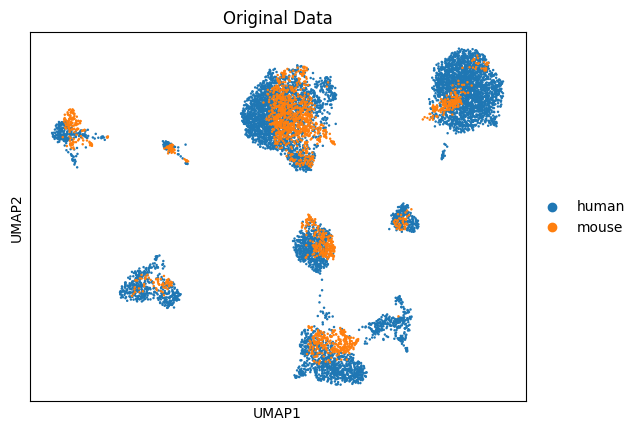

In [19]:
sc.pl.umap(
    orig_adata,
    color="species_label",
    title="Original Data",
    show=False
)
plt.show()
plt.close()

/vast/palmer/home.mccleary/sr2464/.conda/envs/cell2sentence/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


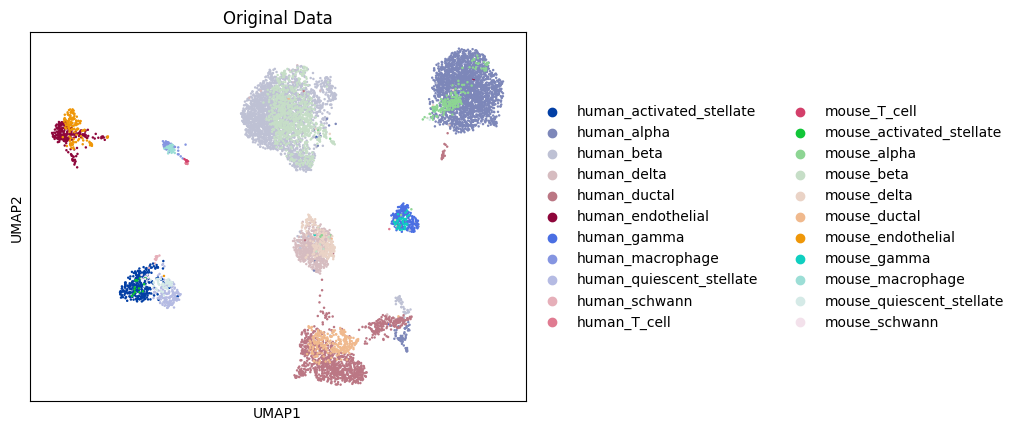

In [20]:
sc.pl.umap(
    orig_adata,
    color="species_cell_type_label",
    title="Original Data",
    show=False
)
plt.show()
plt.close()

Looks like Harmony did not fully converge when tryping to plot it? 
Instead, try to just run neighbors and umap.

In [21]:
orig_adata

AnnData object with n_obs × n_vars = 9436 × 12113
    obs: 'cell_barcodes', 'cell_manual_ids', 'cell_types', 'batch_sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'species_cell_type_label', 'species_label'
    var: 'homolog_pair_idx', 'human_gene_name', 'mouse_gene_name', 'human_gene_ensembl_id', 'mouse_gene_ensembl_id', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'hvg', 'pca', 'neighbors', 'umap', 'species_label_colors', 'species_cell_type_label_colors'
    obsm: 'X_pca', 'X_pca_harmony_library', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [22]:
del orig_adata.obsm["X_umap"]
del orig_adata.obsp

In [23]:
orig_adata

AnnData object with n_obs × n_vars = 9436 × 12113
    obs: 'cell_barcodes', 'cell_manual_ids', 'cell_types', 'batch_sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'species_cell_type_label', 'species_label'
    var: 'homolog_pair_idx', 'human_gene_name', 'mouse_gene_name', 'human_gene_ensembl_id', 'mouse_gene_ensembl_id', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'hvg', 'pca', 'neighbors', 'umap', 'species_label_colors', 'species_cell_type_label_colors'
    obsm: 'X_pca', 'X_pca_harmony_library'
    varm: 'PCs'

In [24]:
sc.pp.neighbors(orig_adata, use_rep="X_pca_harmony_library")

In [25]:
orig_adata

AnnData object with n_obs × n_vars = 9436 × 12113
    obs: 'cell_barcodes', 'cell_manual_ids', 'cell_types', 'batch_sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'species_cell_type_label', 'species_label'
    var: 'homolog_pair_idx', 'human_gene_name', 'mouse_gene_name', 'human_gene_ensembl_id', 'mouse_gene_ensembl_id', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'hvg', 'pca', 'neighbors', 'umap', 'species_label_colors', 'species_cell_type_label_colors'
    obsm: 'X_pca', 'X_pca_harmony_library'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [26]:
sc.tl.umap(orig_adata)

In [27]:
orig_adata

AnnData object with n_obs × n_vars = 9436 × 12113
    obs: 'cell_barcodes', 'cell_manual_ids', 'cell_types', 'batch_sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'species_cell_type_label', 'species_label'
    var: 'homolog_pair_idx', 'human_gene_name', 'mouse_gene_name', 'human_gene_ensembl_id', 'mouse_gene_ensembl_id', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'hvg', 'pca', 'neighbors', 'umap', 'species_label_colors', 'species_cell_type_label_colors'
    obsm: 'X_pca', 'X_pca_harmony_library', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

/vast/palmer/home.mccleary/sr2464/.conda/envs/cell2sentence/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


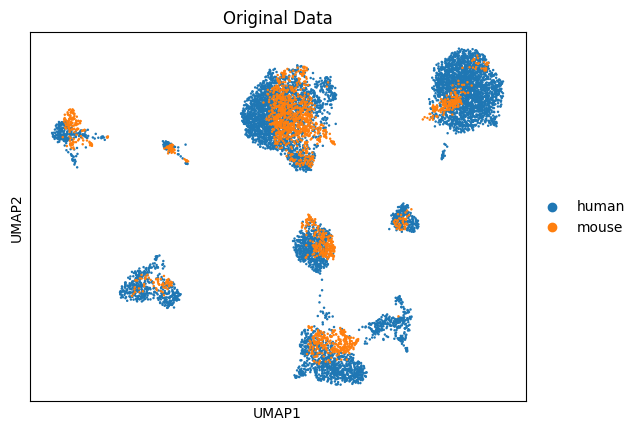

In [28]:
sc.pl.umap(
    orig_adata,
    color="species_label",
    title="Original Data",
    show=False
)
plt.show()
plt.close()

/vast/palmer/home.mccleary/sr2464/.conda/envs/cell2sentence/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


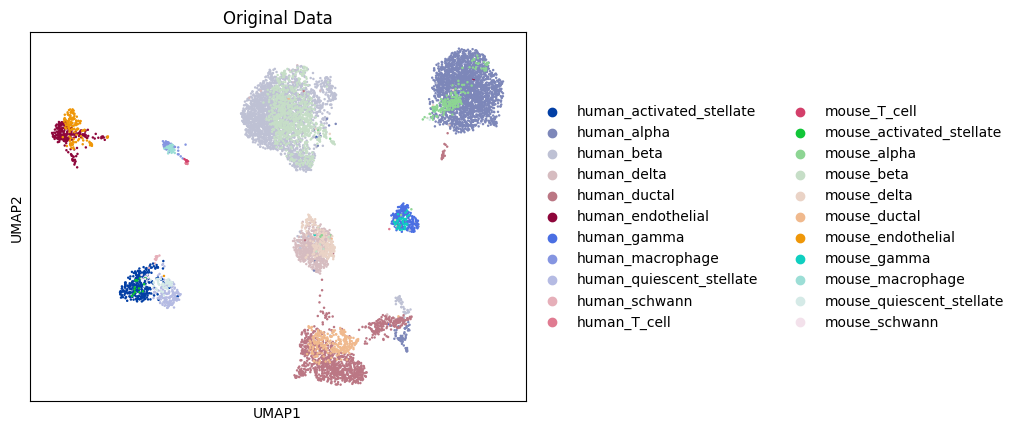

In [29]:
sc.pl.umap(
    orig_adata,
    color="species_cell_type_label",
    title="Original Data",
    show=False
)
plt.show()
plt.close()

## Read CellOT data

In [70]:
cell_ot_transported_data_path

'/home/dor3/cell2sentence/cross_species/CellOT_on_Homologous_Data/models/results_human_to_mouse/evals_iid_data_space/imputed.h5ad'

In [30]:
cell_ot_transport_adata = anndata.read_h5ad(cell_ot_transported_data_path)
cell_ot_transport_adata

AnnData object with n_obs × n_vars = 500 × 50
    obs: 'cell_barcodes', 'cell_manual_ids', 'cell_types', 'batch_sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'species_cell_type_label', 'species_label', 'transport', 'split'

Reduce original adata to just harmony embeddings

In [31]:
orig_adata

AnnData object with n_obs × n_vars = 9436 × 12113
    obs: 'cell_barcodes', 'cell_manual_ids', 'cell_types', 'batch_sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'species_cell_type_label', 'species_label'
    var: 'homolog_pair_idx', 'human_gene_name', 'mouse_gene_name', 'human_gene_ensembl_id', 'mouse_gene_ensembl_id', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'hvg', 'pca', 'neighbors', 'umap', 'species_label_colors', 'species_cell_type_label_colors'
    obsm: 'X_pca', 'X_pca_harmony_library', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [32]:
orig_adata_reduced = anndata.AnnData(
    X=orig_adata.obsm["X_pca_harmony_library"],
    var=cell_ot_transport_adata.var.copy(),
    obs=orig_adata.obs.copy()
)

In [33]:
orig_adata_reduced

AnnData object with n_obs × n_vars = 9436 × 50
    obs: 'cell_barcodes', 'cell_manual_ids', 'cell_types', 'batch_sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'species_cell_type_label', 'species_label'

In [34]:
cell_ot_transport_adata

AnnData object with n_obs × n_vars = 500 × 50
    obs: 'cell_barcodes', 'cell_manual_ids', 'cell_types', 'batch_sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'species_cell_type_label', 'species_label', 'transport', 'split'

## Visualize CellOT transported

In [35]:
cell_ot_transport_adata

AnnData object with n_obs × n_vars = 500 × 50
    obs: 'cell_barcodes', 'cell_manual_ids', 'cell_types', 'batch_sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'species_cell_type_label', 'species_label', 'transport', 'split'

In [36]:
del cell_ot_transport_adata.obsm
del cell_ot_transport_adata.uns
del cell_ot_transport_adata.varm
del cell_ot_transport_adata.obsp

In [37]:
cell_ot_transport_adata

AnnData object with n_obs × n_vars = 500 × 50
    obs: 'cell_barcodes', 'cell_manual_ids', 'cell_types', 'batch_sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'species_cell_type_label', 'species_label', 'transport', 'split'

In [38]:
cell_ot_transport_adata.X[:5, :5]

array([[ 3.0816095 , -0.8455963 , -0.4565071 , -2.7616277 ,  0.01557642],
       [ 3.4287298 , -0.71804905,  0.07897267, -4.0549593 ,  1.2447106 ],
       [-7.842034  , -4.1423154 ,  8.347068  ,  0.8025156 , -0.30217475],
       [ 6.087551  , -4.350356  , -1.4424117 ,  0.36491197, -1.0462272 ],
       [ 2.6701088 ,  2.8418748 ,  0.32270014, -1.0660317 ,  0.1384395 ]],
      dtype=float32)

In [39]:
cell_ot_transport_adata.obsm["X_pca"] = cell_ot_transport_adata.X

In [40]:
cell_ot_transport_adata

AnnData object with n_obs × n_vars = 500 × 50
    obs: 'cell_barcodes', 'cell_manual_ids', 'cell_types', 'batch_sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'species_cell_type_label', 'species_label', 'transport', 'split'
    obsm: 'X_pca'

In [41]:
cell_ot_transport_adata.obsm["X_pca"].shape

(500, 50)

In [42]:
sc.pp.neighbors(cell_ot_transport_adata)

In [43]:
sc.tl.umap(cell_ot_transport_adata)

In [44]:
cell_ot_transport_adata

AnnData object with n_obs × n_vars = 500 × 50
    obs: 'cell_barcodes', 'cell_manual_ids', 'cell_types', 'batch_sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'species_cell_type_label', 'species_label', 'transport', 'split'
    uns: 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'distances', 'connectivities'

In [45]:
cell_ot_transport_adata.obs.head()

,cell_barcodes,cell_manual_ids,cell_types,batch_sample,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,species_cell_type_label,species_label,transport,split
human1_lib1.final_cell_0032,AATATCTTC-ATGTTGGC,human1_lib1.final_cell_0032,delta,GSM2230757_human1_umifm_counts,2002,2002,7051.0,0.0,0.0,human_delta,human,source,test
human1_lib1.final_cell_0034,GACACGGACT-CTGAGTGC,human1_lib1.final_cell_0034,delta,GSM2230757_human1_umifm_counts,1698,1698,6475.0,0.0,0.0,human_delta,human,source,test
human1_lib1.final_cell_0041,GTAACGTT-ATGACTTT,human1_lib1.final_cell_0041,activated_stellate,GSM2230757_human1_umifm_counts,3377,3377,12169.0,0.0,0.0,human_activated_stellate,human,source,test
human1_lib1.final_cell_0088,ACTAGATTG-TCCCAATC,human1_lib1.final_cell_0088,beta,GSM2230757_human1_umifm_counts,2069,2068,5979.0,0.0,0.0,human_beta,human,source,test
human1_lib1.final_cell_0135,GAGCGTTGCT-AACACACG,human1_lib1.final_cell_0135,alpha,GSM2230757_human1_umifm_counts,2460,2460,6151.0,0.0,0.0,human_alpha,human,source,test


In [71]:
cell_ot_transport_adata.obs.tail()

,cell_barcodes,cell_manual_ids,cell_types,batch_sample,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,species_cell_type_label,species_label,transport,split,transport_flag
human4_lib3.final_cell_0603,TGACTTGGTGT-CGAGTCTG,human4_lib3.final_cell_0603,alpha,GSM2230760_human4_umifm_counts,1449,1449,3114.0,0.0,0.0,human_alpha,human,source,test,Transported Human -> Mouse Cells
human4_lib3.final_cell_0607,ACGGAATTT-TAGCCTCG,human4_lib3.final_cell_0607,ductal,GSM2230760_human4_umifm_counts,1248,1248,3196.0,0.0,0.0,human_ductal,human,source,test,Transported Human -> Mouse Cells
human4_lib3.final_cell_0619,GATGGTTTCT-CACAACAG,human4_lib3.final_cell_0619,beta,GSM2230760_human4_umifm_counts,1358,1358,3706.0,0.0,0.0,human_beta,human,source,test,Transported Human -> Mouse Cells
human4_lib3.final_cell_0658,AATGTTGGC-CTTACTCC,human4_lib3.final_cell_0658,alpha,GSM2230760_human4_umifm_counts,1136,1136,3103.0,0.0,0.0,human_alpha,human,source,test,Transported Human -> Mouse Cells
human4_lib3.final_cell_0697,GAGATCTCGG-GTCTCTCT,human4_lib3.final_cell_0697,activated_stellate,GSM2230760_human4_umifm_counts,1055,1055,2100.0,0.0,0.0,human_activated_stellate,human,source,test,Transported Human -> Mouse Cells


In [46]:
Counter(cell_ot_transport_adata.obs["species_label"].tolist())

Counter({'human': 500})

In [47]:
Counter(cell_ot_transport_adata.obs["split"].tolist())

Counter({'test': 500})

In [48]:
Counter(cell_ot_transport_adata.obs["transport"].tolist())

Counter({'source': 500})

/vast/palmer/home.mccleary/sr2464/.conda/envs/cell2sentence/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


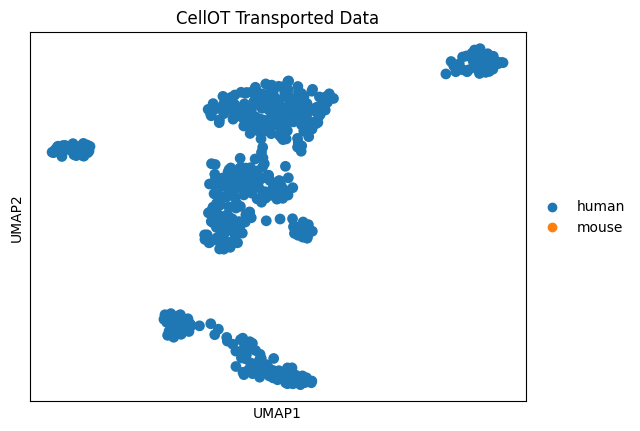

In [49]:
plot_path = os.path.join(plots_dir, "cell_ot_transport_adata_umap.png")
sc.pl.umap(
    cell_ot_transport_adata,
    color="species_label",
    title="CellOT Transported Data",
    show=False
)
plt.savefig(plot_path, facecolor="white", bbox_inches="tight", dpi=300)
plt.show()
plt.close()

## Combine adatas, see where transported cells are

In [50]:
orig_adata_reduced

AnnData object with n_obs × n_vars = 9436 × 50
    obs: 'cell_barcodes', 'cell_manual_ids', 'cell_types', 'batch_sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'species_cell_type_label', 'species_label'

In [51]:
cell_ot_transport_adata

AnnData object with n_obs × n_vars = 500 × 50
    obs: 'cell_barcodes', 'cell_manual_ids', 'cell_types', 'batch_sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'species_cell_type_label', 'species_label', 'transport', 'split'
    uns: 'neighbors', 'umap', 'species_label_colors'
    obsm: 'X_pca', 'X_umap'
    obsp: 'distances', 'connectivities'

In [52]:
del orig_adata_reduced.obsm
del orig_adata_reduced.uns
del orig_adata_reduced.varm
del orig_adata_reduced.obsp

In [53]:
del cell_ot_transport_adata.obsm
del cell_ot_transport_adata.uns
del cell_ot_transport_adata.varm
del cell_ot_transport_adata.obsp

In [54]:
orig_adata_reduced

AnnData object with n_obs × n_vars = 9436 × 50
    obs: 'cell_barcodes', 'cell_manual_ids', 'cell_types', 'batch_sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'species_cell_type_label', 'species_label'

In [55]:
cell_ot_transport_adata

AnnData object with n_obs × n_vars = 500 × 50
    obs: 'cell_barcodes', 'cell_manual_ids', 'cell_types', 'batch_sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'species_cell_type_label', 'species_label', 'transport', 'split'

In [56]:
orig_data_label = ["Original Data (" + species_label + ")" for species_label in orig_adata_reduced.obs["species_label"]]
orig_adata_reduced.obs["transport_flag"] = orig_data_label
cell_ot_transport_adata.obs["transport_flag"] = "Transported Human -> Mouse Cells"

In [57]:
combined_adata = orig_adata_reduced.concatenate(cell_ot_transport_adata)
combined_adata

/vast/palmer/home.mccleary/sr2464/.conda/envs/cell2sentence/lib/python3.8/site-packages/anndata/_core/anndata.py:1763: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(


AnnData object with n_obs × n_vars = 9936 × 50
    obs: 'cell_barcodes', 'cell_manual_ids', 'cell_types', 'batch_sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'species_cell_type_label', 'species_label', 'transport_flag', 'transport', 'split', 'batch'

In [58]:
combined_adata

AnnData object with n_obs × n_vars = 9936 × 50
    obs: 'cell_barcodes', 'cell_manual_ids', 'cell_types', 'batch_sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'species_cell_type_label', 'species_label', 'transport_flag', 'transport', 'split', 'batch'

## Visualize

In [59]:
combined_adata.obsm["X_pca"] = combined_adata.X

In [60]:
combined_adata

AnnData object with n_obs × n_vars = 9936 × 50
    obs: 'cell_barcodes', 'cell_manual_ids', 'cell_types', 'batch_sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'species_cell_type_label', 'species_label', 'transport_flag', 'transport', 'split', 'batch'
    obsm: 'X_pca'

In [61]:
sc.pp.neighbors(combined_adata)

In [62]:
sc.tl.umap(combined_adata)

In [63]:
combined_adata

AnnData object with n_obs × n_vars = 9936 × 50
    obs: 'cell_barcodes', 'cell_manual_ids', 'cell_types', 'batch_sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'species_cell_type_label', 'species_label', 'transport_flag', 'transport', 'split', 'batch'
    uns: 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'distances', 'connectivities'

/vast/palmer/home.mccleary/sr2464/.conda/envs/cell2sentence/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


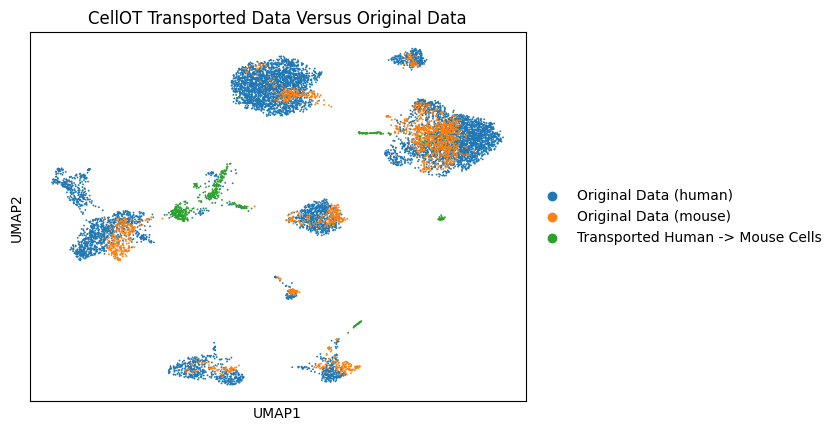

In [64]:
plot_path = os.path.join(plots_dir, "cell_ot_human_transported_vs_orig_data.png")

sc.pl.umap(
    combined_adata,
    color="transport_flag",
    title="CellOT Transported Data Versus Original Data",
    s=7,
    show=False
)
plt.savefig(plot_path, facecolor="white", bbox_inches="tight", dpi=300)
plt.show()
plt.close()

In [65]:
combined_adata

AnnData object with n_obs × n_vars = 9936 × 50
    obs: 'cell_barcodes', 'cell_manual_ids', 'cell_types', 'batch_sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'species_cell_type_label', 'species_label', 'transport_flag', 'transport', 'split', 'batch'
    uns: 'neighbors', 'umap', 'transport_flag_colors'
    obsm: 'X_pca', 'X_umap'
    obsp: 'distances', 'connectivities'

In [66]:
combined_adata[combined_adata.obs["transport_flag"] == "Original Data (mouse)"]

View of AnnData object with n_obs × n_vars = 1868 × 50
    obs: 'cell_barcodes', 'cell_manual_ids', 'cell_types', 'batch_sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'species_cell_type_label', 'species_label', 'transport_flag', 'transport', 'split', 'batch'
    uns: 'neighbors', 'umap', 'transport_flag_colors'
    obsm: 'X_pca', 'X_umap'
    obsp: 'distances', 'connectivities'

/vast/palmer/home.mccleary/sr2464/.conda/envs/cell2sentence/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/vast/palmer/home.mccleary/sr2464/.conda/envs/cell2sentence/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


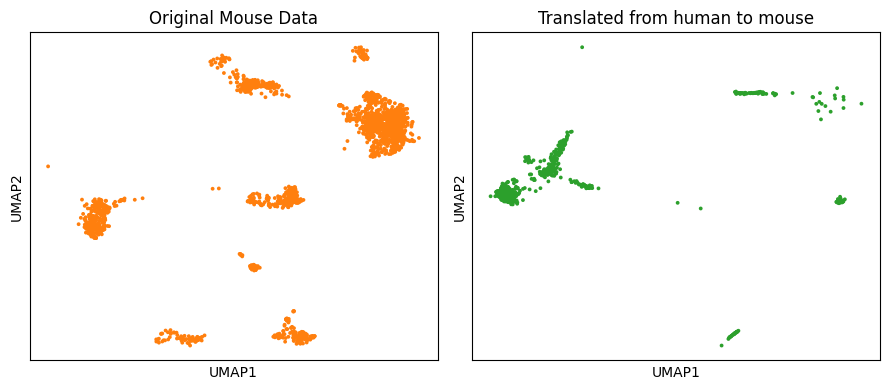

In [67]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))
sc.pl.umap(
    combined_adata[combined_adata.obs["transport_flag"] == "Original Data (mouse)"],
    color="transport_flag",
    show=False,
    size=30,
    ax=ax1,
    legend_loc=None,
    title="Original Mouse Data",
)
sc.pl.umap(
    combined_adata[combined_adata.obs["transport_flag"] == "Transported Human -> Mouse Cells"],
    color="transport_flag",
    show=False,
    size=30,
    ax=ax2,
    legend_loc=None,
    title="Translated from human to mouse",
)
# fig.suptitle("Translated from human to mouse", fontsize=20)
plot_path = os.path.join(plots_dir, "cell_ot_human_transported_vs_mouse_side_by_side.png")
plt.tight_layout()
plt.savefig(plot_path, facecolor="white", bbox_inches="tight", dpi=300)
plt.show()
plt.close()

## Confusion matrix

In [68]:
import sys
sys.executable

'/vast/palmer/home.mccleary/sr2464/.conda/envs/cell2sentence/bin/python'

In [69]:
combined_adata[combined_adata.obs["transport_flag"] != "source"].obs

,cell_barcodes,cell_manual_ids,cell_types,batch_sample,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,species_cell_type_label,species_label,transport_flag,transport,split,batch
human1_lib1.final_cell_0007-0,AAAATCGTT-CTCCGCAT,human1_lib1.final_cell_0007,beta,GSM2230757_human1_umifm_counts,3843,3843,14947.0,0.0,0.0,human_beta,human,Original Data (human),NaN,NaN,0
human1_lib1.final_cell_0013-0,AAAATCGTT-GGAAACAG,human1_lib1.final_cell_0013,delta,GSM2230757_human1_umifm_counts,2357,2357,8338.0,0.0,0.0,human_delta,human,Original Data (human),NaN,NaN,0
human1_lib1.final_cell_0014-0,GATTGAGGGT-CTGGTGCA,human1_lib1.final_cell_0014,delta,GSM2230757_human1_umifm_counts,2191,2191,8155.0,0.0,0.0,human_delta,human,Original Data (human),NaN,NaN,0
human1_lib1.final_cell_0015-0,AAAGTAATC-TCGGTTCG,human1_lib1.final_cell_0015,beta,GSM2230757_human1_umifm_counts,3547,3547,13633.0,0.0,0.0,human_beta,human,Original Data (human),NaN,NaN,0
human1_lib1.final_cell_0016-0,AAATGAATG-ACGGTAGC,human1_lib1.final_cell_0016,activated_stellate,GSM2230757_human1_umifm_counts,3585,3584,13091.0,0.0,0.0,human_activated_stellate,human,Original Data (human),NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
human4_lib3.final_cell_0603-1,TGACTTGGTGT-CGAGTCTG,human4_lib3.final_cell_0603,alpha,GSM2230760_human4_umifm_counts,1449,1449,3114.0,0.0,0.0,human_alpha,human,Transported Human -> Mouse Cells,source,test,1
human4_lib3.final_cell_0607-1,ACGGAATTT-TAGCCTCG,human4_lib3.final_cell_0607,ductal,GSM2230760_human4_umifm_counts,1248,1248,3196.0,0.0,0.0,human_ductal,human,Transported Human -> Mouse Cells,source,test,1
human4_lib3.final_cell_0619-1,GATGGTTTCT-CACAACAG,human4_lib3.final_cell_0619,beta,GSM2230760_human4_umifm_counts,1358,1358,3706.0,0.0,0.0,human_beta,human,Transported Human -> Mouse Cells,source,test,1
human4_lib3.final_cell_0658-1,AATGTTGGC-CTTACTCC,human4_lib3.final_cell_0658,alpha,GSM2230760_human4_umifm_counts,1136,1136,3103.0,0.0,0.0,human_alpha,human,Transported Human -> Mouse Cells,source,test,1


In [ ]:
source_data

In [ ]:
translated.obs.head()

In [ ]:
print("Available columns in source data:", source_data.columns.tolist())
print("Available columns in translated data:", translated.obs.columns.tolist())


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from cellot.utils.evaluate import load_conditions

def create_celltype_confusion_matrix(expdir, 
                                   source_cell_type_col=None,  # Will be passed separately
                                   target_cell_type_col='species_cell_type_label', 
                                   where='data_space', 
                                   setting='iid', 
                                   embedding=None):
    """
    Create a confusion matrix showing how cell types map between source and target domains.
    Handles DataFrame source data and AnnData translated data.
    
    Parameters:
    -----------
    expdir : Path or str
        Directory containing the model and evaluation data
    source_cell_type_col : Series
        Cell type labels for source data (passed separately)
    target_cell_type_col : str
        Name of the column in translated data containing cell type labels
    where : str
        Space to compute the mapping in ('data_space' or 'latent_space')
    setting : str
        Evaluation setting ('iid' or 'ood')
    embedding : str or None
        Embedding context if applicable
    
    Returns:
    --------
    confusion_matrix : pd.DataFrame
        Normalized confusion matrix
    raw_counts : pd.DataFrame
        Raw count matrix before normalization
    """
    # Load the source and translated data
    _, source_data, translated = load_conditions(expdir, where, setting, embedding=embedding)
    
    if source_cell_type_col is None:
        raise ValueError("Please provide source cell type labels as a pandas Series")
        
    # Extract cell types from translated data
    try:
        translated_types = translated.obs[target_cell_type_col]
    except KeyError:
        print(f"Column '{target_cell_type_col}' not found. Available columns in translated data:")
        print(translated.obs.columns.tolist())
        raise
    
    # Find nearest neighbors for each translated cell in the source space
    nn = NearestNeighbors(n_neighbors=1)
    nn.fit(source_data)  # source_data is already PCA components
    
    # Get expression data from translated AnnData object
    if hasattr(translated.X, 'toarray'):  # Handle sparse matrix
        translated_exp = translated.X.toarray()
    else:
        translated_exp = translated.X
        
    distances, indices = nn.kneighbors(translated_exp)
    
    # Get mapped cell types
    mapped_types = source_cell_type_col.iloc[indices.flatten()]
    
    # Create confusion matrix
    confusion = pd.crosstab(
        mapped_types, 
        translated_types,
        normalize='columns'  # Normalize by target (translated) population
    )
    
    # Create raw count matrix
    raw_counts = pd.crosstab(mapped_types, translated_types)
    
    return confusion, raw_counts

def plot_confusion_matrix(confusion_matrix, title="Cell Type Mapping", figsize=(12, 10)):
    """
    Plot the confusion matrix as a heatmap.
    """
    plt.figure(figsize=figsize)
    
    # Create heatmap
    sns.heatmap(
        confusion_matrix,
        annot=True,  # Show numbers in cells
        fmt='.2f',   # Format as 2 decimal places
        cmap='YlOrRd',
        square=True,
        cbar_kws={'label': 'Proportion of Cells'}
    )
    
    # Customize plot
    plt.title(title)
    plt.xlabel('Human Cell Types (Target)')
    plt.ylabel('Mouse Cell Types (Source)')
    
    # Rotate labels for better readability
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    
def analyze_mapping_statistics(confusion_matrix, raw_counts):
    """
    Compute statistics about the cell type mapping.
    """
    stats = {
        'primary_mapping_accuracy': np.mean(np.max(confusion_matrix.values, axis=0)),
        'total_cells_mapped': raw_counts.values.sum(),
        'mappings_per_source': raw_counts.sum(axis=1).describe(),
        'mappings_per_target': raw_counts.sum(axis=0).describe(),
        'dominant_mappings': pd.DataFrame({
            'source_type': confusion_matrix.index[confusion_matrix.values.argmax(axis=0)],
            'proportion': confusion_matrix.values.max(axis=0)
        }, index=confusion_matrix.columns)
    }
    return stats

In [ ]:
from pathlib import Path
expdir = Path('/home/dor3/cell2sentence/cross_species/CellOT_on_Homologous_Data/models/results_mouse_to_human')


In [ ]:
source_data

In [ ]:
# Convert indices of source_data into a series
source_labels = pd.Series(source_data.index.to_list())

In [ ]:
orig_adata_reduced.obs.tail()

In [ ]:
source_labels

In [ ]:
type_col='cell_types'

label_to_type = pd.Series(
        orig_adata.obs[type_col].values,
        index=orig_adata.obs.index
    )
    
# Map cell labels to their types
cell_types = cell_labels.map(label_to_type)

# Check if any labels weren't found
if cell_types.isna().any():
    missing_labels = cell_labels[cell_types.isna()]
    print(f"Warning: {len(missing_labels)} cell labels not found in original data:")
    print(missing_labels.head())
    print("\nFirst few labels in original data:")
    print(orig_adata.obs.index[:5])
    

In [ ]:
cell_types

In [ ]:
from pathlib import Path
expdir = Path('/home/dor3/cell2sentence/cross_species/CellOT_on_Homologous_Data/models/results_mouse_to_human')

In [ ]:
orig_adata_reduced.obs.head()

In [ ]:
df = orig_adata_reduced.to_df()

In [ ]:
df.head()

In [ ]:
source_data

In [ ]:
translated.obs.head()

In [ ]:
if isinstance(source_data, pd.DataFrame):
    source_data_array=source_data.values
else:
    source_data_array=source_data

In [ ]:
# Get expression data from translated AnnData object
if hasattr(translated.X, 'toarray'):  # Handle sparse matrix
    translated_exp = translated.X.toarray()
else:
    translated_exp = translated.X

In [ ]:
label_to_type = pd.Series(
        orig_adata_reduced.obs[cell_types].values,
        index=orig_adata_reduced.obs.index
    )
source_types = source_labels.map(label_to_type)

In [ ]:
def create_celltype_confusion_matrix(expdir, source_labels, orig_adata,
                                   target_cell_type_col='cell_types', 
                                   where='data_space', setting='iid', embedding=None):
    """
    Create a confusion matrix showing how cell types map between source and target domains.
    
    Parameters:
    -----------
    expdir : Path or str
        Directory containing the model and evaluation data
    source_labels : pd.Series
        Series of source cell labels
    orig_adata : AnnData
        Original AnnData object containing cell type information
    target_cell_type_col : str
        Name of the column in translated data containing cell type labels
    where : str
        Space to compute the mapping in ('data_space' or 'latent_space')
    setting : str
        Evaluation setting ('iid' or 'ood')
    embedding : str or None
        Embedding context if applicable
    
    Returns:
    --------
    confusion_matrix : pd.DataFrame
        Normalized confusion matrix
    raw_counts : pd.DataFrame
        Raw count matrix before normalization
    mapped_data : dict
        Dictionary containing additional mapping information
    """
    # Load the source and translated data
    _, source_data, translated = load_conditions(expdir, where, setting, embedding=embedding)
    
    # Convert source_data to numpy array if it's a DataFrame
    if isinstance(source_data, pd.DataFrame):
        source_data_array = source_data.values
    else:
        source_data_array = source_data
        
    # Get source cell types by matching labels with orig_adata index
    label_to_type = pd.Series(
        orig_adata.obs[target_cell_type_col].values,
        index=orig_adata.obs.index
    )
    source_types = source_labels.map(label_to_type)
    
    # Check for missing mappings
    if source_types.isna().any():
        missing_count = source_types.isna().sum()
        print(f"Warning: {missing_count} source labels couldn't be matched to cell types")
        print("First few missing labels:", source_labels[source_types.isna()][:5].tolist())
    
    # Extract cell types from translated data
    try:
        translated_types = translated.obs[target_cell_type_col]
    except KeyError:
        print(f"Column '{target_cell_type_col}' not found. Available columns in translated data:")
        print(translated.obs.columns.tolist())
        raise
    
    # Get expression data from translated AnnData object
    if hasattr(translated.X, 'toarray'):  # Handle sparse matrix
        translated_exp = translated.X.toarray()
    else:
        translated_exp = translated.X
    
    # Find nearest neighbors
    nn = NearestNeighbors(n_neighbors=1)
    nn.fit(source_data_array)
    distances, indices = nn.kneighbors(translated_exp)
    
    # Get mapped cell types
    mapped_types = source_types.iloc[indices.flatten()]
    
    # Create confusion matrix
    confusion = pd.crosstab(
        mapped_types, 
        translated_types,
        normalize='columns'  # Normalize by target (translated) population
    )
    
    # Create raw count matrix
    raw_counts = pd.crosstab(mapped_types, translated_types)
    
    # Store additional mapping information
    mapped_data = {
        'source_labels': source_labels.iloc[indices.flatten()],
        'source_types': mapped_types,
        'target_types': translated_types,
        'distances': distances.flatten()
    }
    
    return confusion, raw_counts, mapped_data


In [ ]:
# Create confusion matrix
confusion, raw_counts, mapped_data = create_celltype_confusion_matrix(
    expdir,
    source_labels=source_labels,
    orig_adata=orig_adata_reduced,
    target_cell_type_col='cell_types'
)

In [ ]:
# Plot results
plot_confusion_matrix(confusion)
plt.tight_layout()
plt.show()

In [ ]:
# Load your source cell type labels (you'll need to provide these)
source_cell_types = pd.Series(['type1', 'type2', ...])  # Replace with actual labels
